In [1]:
import openai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from openai.embeddings_utils import cosine_similarity
from openai.embeddings_utils import get_embedding

In [2]:
df = pd.read_csv("EPiC Database 2019.csv", names = ['Category', 'Material', 'Functional unit', 'Embodied Energy (MJ)', 'Embodied Water (L)', 'Embodied Greenhouse Gas Emissions (kgCO₂e)', 'More information'], skiprows= 1)
df.head(10) 


,Category,Material,Functional unit,Embodied Energy (MJ),Embodied Water (L),Embodied Greenhouse Gas Emissions (kgCO₂e),More information
0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc
1,Concrete and plaster products,Concrete block - 390 × 190 × 90 mm,no.,24.3,34.2,2.2,http://doi.org/10.26188/5da552ea39cdc
2,Concrete and plaster products,Concrete block - 390 × 190 × 140 mm,no.,29.6,41.6,2.7,http://doi.org/10.26188/5da552ea39cdc
3,Concrete and plaster products,Concrete block - 390 × 190 × 190 mm,no.,35.2,49.4,3.2,http://doi.org/10.26188/5da552ea39cdc
4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432
5,Concrete and plaster products,Portland cement,kg,11.8,7.8,1.3,http://doi.org/10.26188/5da55701cee5d
6,Concrete and plaster products,Autoclaved aerated concrete (AAC),kg,8.5,8.4,0.71,http://doi.org/10.26188/5da551fc254d7
7,Concrete and plaster products,AAC block - 600 × 200 × 100 mm,no.,56.4,55.4,4.7,http://doi.org/10.26188/5da551fc254d7
8,Concrete and plaster products,AAC block - 600 × 200 × 150 mm,no.,84.5,83,7,http://doi.org/10.26188/5da551fc254d7
9,Concrete and plaster products,AAC block - 600 × 200 × 200 mm,no.,113,111,9.4,http://doi.org/10.26188/5da551fc254d7


In [3]:
# from openai.embeddings_utils import get_embedding

# test_df['embeddings'] = test_df['Material'].apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))
# test_df.to_csv('word_embeddings.csv')

In [4]:
df_em = pd.read_csv('word_embeddings.csv')
df_em['embeddings'] = df_em['embeddings'].apply(eval).apply(np.array)
df_em

,Unnamed: 0,Material,embeddings
0,0,0. Plasterboard-Standard-Paint-White-Matte,"[0.003881110344082117, 0.0034373656380921602, ..."
1,1,1. Masonry-Block-190x390-Running-Natural,"[-0.0011347883846610785, 0.0077765635214746, -..."
2,2,2. EDEN_Wet-Areas-Wall-Tile-600-x-600,"[0.009853625670075417, 0.010180942714214325, -..."
3,3,3. ---Plasterboard---Plasterboard,"[-0.004548346158117056, 0.004125015344470739, ..."
4,4,4. Wood-Pine-Stud,"[-0.0007378872251138091, 0.008706395514309406,..."
5,5,5. ATO_Timber-Shiplap_45UP,"[-0.028975583612918854, 0.015434159897267818, ..."
6,6,6. Metal-Steel-Furring-Zincalume,"[-0.003701475216075778, 0.012387648224830627, ..."
7,7,7. ACU_PLY01_PLYWOOD,"[-0.002357288496568799, 0.0019214723724871874,..."
8,8,8. ATO_Timber-Shiplap_45DOWN,"[-0.03163563087582588, 0.010707972571253777, -..."
9,9,9. ---PLYWOOD,"[0.004955127369612455, -0.009813971817493439, ..."


In [5]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np

# Load the embeddings
pddf = pd.read_csv('word_embeddings.csv')

# Convert to a list of lists of floats
matrix = np.array(pddf.embeddings.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(53, 2)

In [6]:
# import matplotlib.pyplot as plt
# import matplotlib
# import numpy as np

# colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
# x = [x for x,y in vis_dims]
# y = [y for x,y in vis_dims]
# color_indices = pddf.Material.values - 1

# colormap = matplotlib.colors.ListedColormap(colors)
# plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
# for score in [0,1,2,3,4]:
#     avg_x = np.array(x)[pddf.Material-1==score].mean()
#     avg_y = np.array(y)[pddf.Material-1==score].mean()
#     color = colors[score]
#     plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

# plt.title("Amazon ratings visualized in language using t-SNE")

In [7]:
search_term = input('Enter a search term: ')

In [8]:
search_term_vector = get_embedding(search_term, engine='text-embedding-ada-002')
search_term_vector

[-0.011490710079669952,
 0.0077909985557198524,
 -0.015082400292158127,
 -0.021793190389871597,
 0.008412118069827557,
 0.0030144548509269953,
 -0.030785920098423958,
 -0.009681361727416515,
 -0.009573341347277164,
 -0.012712694704532623,
 0.002050706883892417,
 0.02596549317240715,
 -0.010059434920549393,
 -0.004533496685326099,
 -0.027896365150809288,
 -0.0026667627971619368,
 0.03094795159995556,
 0.02082100510597229,
 0.023805078119039536,
 -0.0064036063849925995,
 -0.027234738692641258,
 -0.006727668922394514,
 -0.002437218790873885,
 -0.04029174894094467,
 -0.015771033242344856,
 -0.009478823281824589,
 0.011693248525261879,
 -0.023427005857229233,
 0.006241575349122286,
 -0.023264974355697632,
 0.004857559222728014,
 -0.04296526312828064,
 -0.020591460168361664,
 -0.011949798092246056,
 -0.016189614310860634,
 -0.012152337469160557,
 -0.012564166449010372,
 -0.01543346792459488,
 0.007453433237969875,
 -0.00322205713018775,
 0.03753722086548805,
 -0.018309520557522774,
 0.009478

In [9]:
from openai.embeddings_utils import cosine_similarity
df_em['similarities'] = df_em['embeddings'].apply(lambda x: cosine_similarity(x, search_term_vector))
df_em.sort_values("similarities", ascending=False).head(20)

,Unnamed: 0,Material,embeddings,similarities
21,21,21. ---CONCRETE----Concrete,"[-0.002465516561642289, 0.01187960896641016, 0...",0.927748
34,34,34. Concrete,"[0.0062568457797169685, 0.012251487001776695, ...",0.926760
36,36,36. ---CONCRETE----Concrete-hob,"[-0.0033381637185811996, 0.011316761374473572,...",0.866509
15,15,15. ---FC---Fibre-Cement,"[0.001501024467870593, 0.0311549361795187, -0....",0.821470
22,22,22. Terrazzo-tiles,"[-0.00482450146228075, 0.007756778504699469, 0...",0.815842
10,10,10. ---TIMBER---Timber,"[-0.00831592082977295, -0.028976716101169586, ...",0.807510
1,1,1. Masonry-Block-190x390-Running-Natural,"[-0.0011347883846610785, 0.0077765635214746, -...",0.803041
35,35,35. Base-material,"[0.01027902401983738, 0.012916763313114643, -0...",0.801728
29,29,29. Timber,"[-0.009792777709662914, -0.019705304875969887,...",0.798397
47,47,47. Timber-columns,"[-0.021696606650948524, 0.0031368385534733534,...",0.797709


In [10]:
# from openai.embeddings_utils import get_embedding

# df['embeddings'] = df['Material'].apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))
# df.to_csv('word_embeddings_EPiC.csv')

In [11]:
df_epic = pd.read_csv('word_embeddings_EPiC.csv')
df_epic['embeddings'] = df_epic['embeddings'].apply(eval).apply(np.array)
df_epic

,Unnamed: 0,Category,Material,Functional unit,Embodied Energy (MJ),Embodied Water (L),Embodied Greenhouse Gas Emissions (kgCO₂e),More information,embeddings
0,0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc,"[-0.02005346491932869, -0.0024382583796977997,..."
1,1,Concrete and plaster products,Concrete block - 390 × 190 × 90 mm,no.,24.3,34.2,2.2,http://doi.org/10.26188/5da552ea39cdc,"[-0.005028039216995239, 0.006394283380359411, ..."
2,2,Concrete and plaster products,Concrete block - 390 × 190 × 140 mm,no.,29.6,41.6,2.7,http://doi.org/10.26188/5da552ea39cdc,"[-0.00465925969183445, 0.008461344987154007, -..."
3,3,Concrete and plaster products,Concrete block - 390 × 190 × 190 mm,no.,35.2,49.4,3.2,http://doi.org/10.26188/5da552ea39cdc,"[-0.0043403590098023415, 0.008137354627251625,..."
4,4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432,"[-0.012803852558135986, 0.014618215151131153, ..."
...,...,...,...,...,...,...,...,...,...
279,279,Timber products,Structural insulated panel (SIP),m²,2 624,4 219,135,http://doi.org/10.26188/5da5586fec593,"[-0.009794671088457108, 0.009694453328847885, ..."
280,280,Timber products,SIP - 142 mm,m²,3 327,5 349,171,http://doi.org/10.26188/5da5586fec593,"[0.00539021659642458, 0.01879829913377762, -0...."
281,281,Timber products,SIP - 162 mm,m²,3 795,6 103,195,http://doi.org/10.26188/5da5586fec593,"[0.0035224827006459236, 0.023833518847823143, ..."
282,282,Timber products,Softwood,m³,9 392,13 091,549,http://doi.org/10.26188/5da5578416cc9,"[0.003608147846534848, -0.011392055079340935, ..."


In [12]:
search_term_epic = input('Enter a search term: ')

In [13]:
search_term_vector_epic = get_embedding(search_term_epic, engine='text-embedding-ada-002')
df_epic['similarities'] = df_epic['embeddings'].apply(lambda x: cosine_similarity(x, search_term_vector_epic))
df_epic.sort_values("similarities", ascending=False).head(10)

,Unnamed: 0,Category,Material,Functional unit,Embodied Energy (MJ),Embodied Water (L),Embodied Greenhouse Gas Emissions (kgCO₂e),More information,embeddings,similarities
4,4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432,"[-0.012803852558135986, 0.014618215151131153, ...",0.864539
0,0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc,"[-0.02005346491932869, -0.0024382583796977997,...",0.864011
16,16,Concrete and plaster products,Concrete 32 MPa,m³,3 015,4 300,416,http://doi.org/10.26188/5da550538b369,"[0.013591989874839783, 0.007851066067814827, -...",0.853670
13,13,Concrete and plaster products,Concrete 25 MPa,m³,2 581,4 196,361,http://doi.org/10.26188/5da54a4ae57a1,"[-0.008547145873308182, 0.0053861006163060665,...",0.852403
10,10,Concrete and plaster products,Concrete 20 MPa,m³,2 404,4 154,328,http://doi.org/10.26188/5da54a205d0e5,"[0.0015791815239936113, 0.005774808581918478, ...",0.852237
22,22,Concrete and plaster products,Concrete 50 MPa,m³,3 998,4 365,600,http://doi.org/10.26188/5da5514c0eea5,"[0.0003159770858474076, 0.0004473714216146618,...",0.851791
19,19,Concrete and plaster products,Concrete 40 MPa,m³,3 476,4 355,497,http://doi.org/10.26188/5da5507e33fe6,"[0.001810640562325716, 0.0036380928941071033, ...",0.850175
6,6,Concrete and plaster products,Autoclaved aerated concrete (AAC),kg,8.5,8.4,0.71,http://doi.org/10.26188/5da551fc254d7,"[-0.0046515814028680325, 0.0014236009446904063...",0.843380
15,15,Concrete and plaster products,Concrete 25 MPa - 30% GGBFS,m³,2 441,4 105,293,http://doi.org/10.26188/5da54a4ae57a1,"[0.00041449032141827047, 0.01288472767919302, ...",0.839894
151,151,Miscellaneous,Asphalt,kg,4.2,2.9,0.2,http://doi.org/10.26188/5da551ed753b9,"[0.007402673363685608, 0.008161581121385098, -...",0.839225


In [14]:
def search_materials(df_epic, material_description, n=5, pprint=True):
    material_embedding = get_embedding(
        material_description,
        engine="text-embedding-ada-002"
    )
    df_epic["similarities"] = df_epic.embeddings.apply(lambda x: cosine_similarity(x, material_embedding))

    results = (
        df_epic.sort_values("similarities", ascending=False)
        .head(n)
        .loc[:, "Material"] #<--- how to get two columns and return everything
    )
    if pprint:
        for r in results:
            print(r)
            print()
    return results

In [22]:
results = search_materials(df_epic, "steel reinforcement", n=5)

Steel reinforcement bar - 8 mm dia.

Steel reinforcement bar - 6 mm dia.

Steel reinforcement bar - 12 mm dia.

Steel bar

Stainless steel wire



In [16]:
results = search_materials(df_epic, "Timber Lining", n=5)

Glued laminated timber (glulam)

Cross laminated timber (CLT)

Softwood

Laminated veneer lumber (LVL)

Softwood kiln-dried



In [17]:
results = search_materials(df_epic, "Plasterboard Impact", n=5)

Plasterboard - 10 mm

Plasterboard - 13 mm

Gypsum plaster

Particleboard

Particleboard outdoor



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the embeddings
df_epic_em = pd.read_csv('word_embeddings_EPiC.csv')

matrix = np.array(df_epic_em.embeddings.apply(eval).to_list())

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

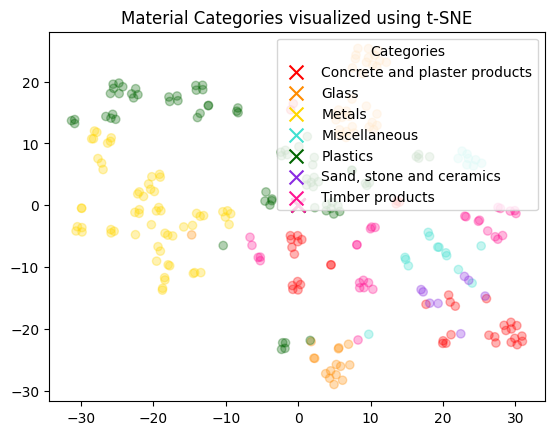

In [19]:
categories = df_epic_em['Category'].unique()
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen", "blueviolet", "deeppink"]
x = [coord[0] for coord in vis_dims]
y = [coord[1] for coord in vis_dims]
color_indices = df_epic_em.Category.astype('category').cat.codes
colormap = mcolors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score, color in enumerate(colors):
    avg_x = df_epic_em[df_epic_em.Category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[0]).mean()
    avg_y = df_epic_em[df_epic_em.Category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[1]).mean()
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100, label=categories[score])
plt.legend(title='Categories', loc='upper right')

plt.title("Material Categories visualized using t-SNE")
plt.show()